C:\Users\yustr\AppData\Local\Temp\ipykernel_3604\249952537.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
C:\Users\yustr\AppData\Local\Temp\ipykernel_3604\249952537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['InvoiceDate'].dt.month
C:\Users\yustr\AppData\Local\Temp\ipykernel_3604\249952537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

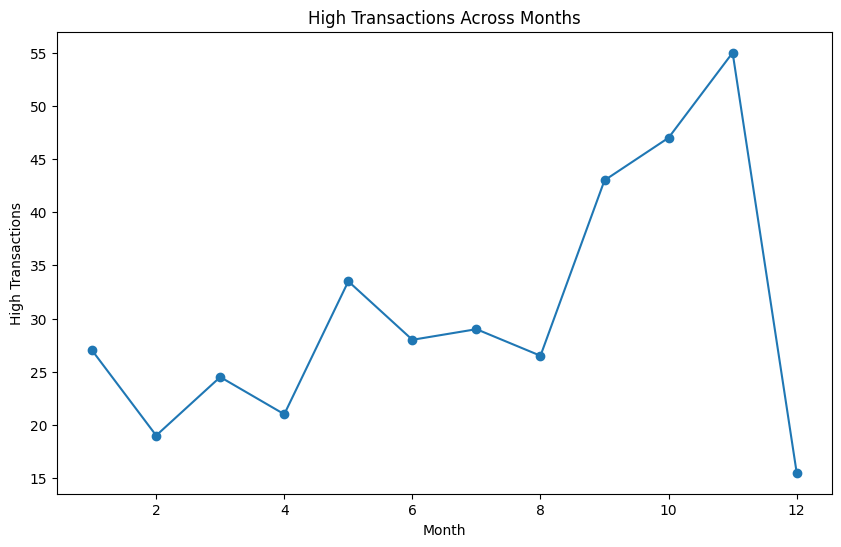

Transaksi Tinggi pada Bulan 1: 27.0
Transaksi Tinggi pada Bulan 2: 19.0
Transaksi Tinggi pada Bulan 3: 24.5
Transaksi Tinggi pada Bulan 4: 21.0
Transaksi Tinggi pada Bulan 5: 33.5
Transaksi Tinggi pada Bulan 6: 28.0
Transaksi Tinggi pada Bulan 7: 29.0
Transaksi Tinggi pada Bulan 8: 26.5
Transaksi Tinggi pada Bulan 9: 43.0
Transaksi Tinggi pada Bulan 10: 47.0
Transaksi Tinggi pada Bulan 11: 55.0
Transaksi Tinggi pada Bulan 12: 15.5
Predicted High Transactions for January 2012: 40.86363636363636


C:\Users\yustr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Langkah 1
dataset = pd.read_csv('transaction.csv')

# Langkah 2
data = dataset[['InvoiceNo', 'Country', 'InvoiceDate']]
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year

# Langkah 3-8
transaksi_tinggi = []

for i in range(1, 13):
    # Langkah 3
    data_bulan = data[(data['month'] == i) & (data['year'] == 2011)]
    
    # Langkah 4
    transaksi = data_bulan.groupby('Country')['InvoiceNo'].nunique().reset_index()
    
    # Langkah 5
    clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
    transaksi['Cluster'] = clustering.fit_predict(transaksi[['InvoiceNo']])
    
    # Langkah 6
    centroid = transaksi.groupby('Cluster')['InvoiceNo'].mean().reset_index()
    
    # Langkah 7
    sorted_centroid = centroid.sort_values('InvoiceNo')
    
    # Langkah 8
    transaksi_tinggi.append(sorted_centroid.iloc[-1]['InvoiceNo'])
    
    # Cetak transaksi dan centroid untuk setiap bulan
    # print(f"Transaksi untuk Bulan {i}:\n{transaksi}")
    # print(f"Centroid untuk Bulan {i}:\n{sorted_centroid}")

# Langkah 9
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), transaksi_tinggi, marker='o')
plt.xlabel('Month')
plt.ylabel('High Transactions')
plt.title('High Transactions Across Months')
plt.show()

# Langkah 10
X = pd.DataFrame({'Month': range(1, 13)})
y = pd.DataFrame({'High Transactions': transaksi_tinggi})

model = LinearRegression()
model.fit(X, y)
    
# Cetak transaksi_tinggi untuk setiap bulan
for i, tinggi in enumerate(transaksi_tinggi, start=1):
    print(f'Transaksi Tinggi pada Bulan {i}: {tinggi}')

# Prediksi nilai transaksi tinggi untuk bulan Januari 2012
predicted_val = model.predict([[13]])[0][0]
print(f'Predicted High Transactions for January 2012: {predicted_val}')